# Phase 1 Project

* Student name: **Ezekiel Ngungu Kathoka**
* Student pace: **part time**
* Scheduled project review date/time: **November 24th 2024**
* Instructor name: **Bonface Manyara**
* Blog post URL:


## Business Understanding

The primary objective is to analyze and predict the risk involved in purchasing and operating airplanes for commercial and private entreprises as part of a my company's new diversification plan.

## Problem statement

I am aiming to analyze the AviationData dataset to identify key factors that would affect the viability of the project by analysing the risk of airplane accidents and the survival rates from such accidents.

## Objectives

1) Analyze the the relationship between engine type and number of accidents.

2) Analyze the the corelation between the number of engines per aircraft and number of accidents recorded.

3) Identify and analyze key factors that contribute to aircraft accidents e.g weather conditions, amateur built.

4) Develop visualizations to effectively communicate the insights and findings derived from the analysis

## Research Questions

1) What are the key airplane features that influence the likelihood of an aircraft accident?

2) Does the countries of operation matter when evaluating the likelihood of an airplane accident?

3) How does the phase of the flight affect the survival rate of passengers incase of an accident

## Data Understanding

In [34]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Aviation_Data = pd.read_csv('Aviation_Data.csv', low_memory=False)

In [35]:
csv_file_path = "./Aviation_Data.csv"

In [36]:
with open(csv_file_path) as csvfile:
    print(csvfile.readline())

Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date



In [37]:
Aviation_Data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [38]:
Aviation_Data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [39]:
# To get the summary information about the dataset
Aviation_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [40]:
#Statistical aspects of the data
Aviation_Data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Identifying Missing Data

In [41]:
#missing values
Aviation_Data.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

## Handling Missing Data

In [42]:
# Fill missing values (NaN) in specific columns of the 'Aviation_data' DataFrame
# Set missing values to 0
Aviation_Data = Aviation_Data.fillna({'Total.Fatal.Injuries': 0, 'Total.Serious.Injuries':0, 'Total.Minor.Injuries':0, 'Total.Uninjured':0, 'Number.of.Engines':0})

In [43]:
#Replacing missing values in the Aircraft damage/Phase of flight column
Aviation_Data = Aviation_Data.fillna({'Aircraft.damage': 'Unknown', 'Broad.phase.of.flight': 'Unknown'})

In [50]:
#Additional replacement of missing values
Aviation_Data = Aviation_Data.fillna({'Amateur.Built': 'Undefined', 'Engine.Type': 'Unknown', 'Weather.Condition': 'Unknown'})

In [51]:
#Additional replacement of missing values
Aviation_Data = Aviation_Data.fillna({'Accident.Number': 'Undefined', 'Event.Date': 'Unknown'})

In [45]:
#Additional replacement of missing values
Aviation_Data = Aviation_Data.fillna({'Country': 'Undefined', 'Location': 'Unknown', 'Injury.Severity': 'Unknown', 'Model': 0, 'Make': 'Unknown', 'Purpose.of.flight': 'Unknown',})

In [46]:
#Dropping unneccesary columns with huge missing data
Aviation_Data = Aviation_Data.drop(['Aircraft.Category', 'Latitude', 'Longitude' ,'Airport.Code', 'FAR.Description', 'Air.carrier', 'Schedule'], axis=1)

In [47]:
#Dropping additional unneccesary columns with huge missing data
Aviation_Data = Aviation_Data.drop(['Event.Id', 'Airport.Name', 'Registration.Number' ,'Report.Status'], axis=1)

In [48]:
#Forward filing of missing data in publicattion date
Aviation_Data['Publication.Date'] = Aviation_Data['Publication.Date'].fillna(method='bfill')

In [66]:
#updated columns
Aviation_Data.isna().sum()

Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Publication.Date          0
Year                      0
dtype: int64

In [53]:
#Check if we have duplicated data
Aviation_Data.duplicated().sum()

1002

In [54]:
Aviation_Data.drop_duplicates(keep='last')

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Publication.Date
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,19-09-1996
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,19-09-1996
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,26-02-2007
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,12-09-2000
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,0.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Unknown,PIPER,PA-28-151,No,0.0,Unknown,Personal,0.0,1.0,0.0,0.0,Unknown,Unknown,29-12-2022
90344,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,BELLANCA,7ECA,No,0.0,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,27-12-2022
90345,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,27-12-2022
90346,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,CESSNA,210N,No,0.0,Unknown,Personal,0.0,0.0,0.0,0.0,Unknown,Unknown,30-12-2022


In [56]:
#Check the shape of the data
Aviation_Data.shape

(90348, 20)

## Data Analysis

## 1) Bar Graph- Number of accidents vs Engine type

In [58]:
#Creating a summary of number of accidents by engine type
Summary_data1 = Aviation_Data.pivot_table(aggfunc='size', index='Engine.Type', fill_value=0)
print(Summary_data1)

Engine.Type
Electric              10
Geared Turbofan       12
Hybrid Rocket          1
LR                     2
NONE                   2
None                  19
Reciprocating      69530
Turbo Fan           2481
Turbo Jet            703
Turbo Prop          3391
Turbo Shaft         3609
UNK                    1
Unknown            10587
dtype: int64


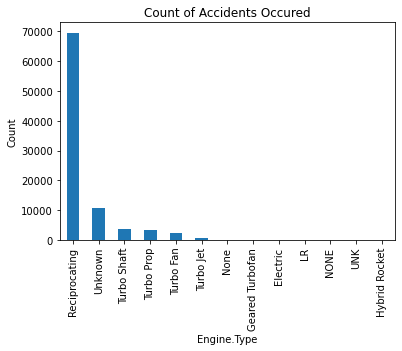

In [59]:
Aviation_Data['Engine.Type'].value_counts().plot(kind='bar')
plt.title('Count of Accidents Occured')
plt.xlabel('Engine.Type')
plt.ylabel('Count')
plt.show()

## 2.Bar Graph - Accidents Frequency vs Weather

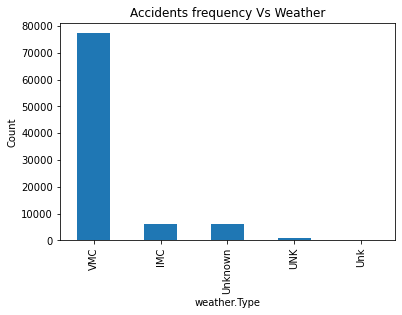

In [60]:
Aviation_Data['Weather.Condition'].value_counts().plot(kind='bar')
plt.title('Accidents frequency Vs Weather')
plt.xlabel('weather.Type')
plt.ylabel('Count')
plt.show()

## 3) Pie Chart- Accidents Impact on Passengers

In [61]:
Aviation_data_selected = Aviation_Data[['Total.Fatal.Injuries', 'Total.Uninjured', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

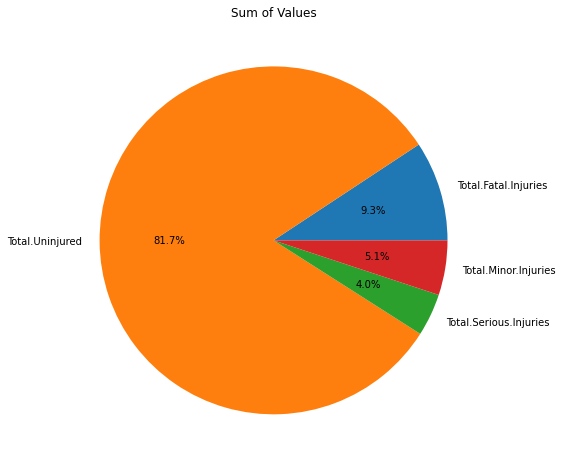

In [62]:
Aviation_data_selected.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title="Sum of Values")
plt.ylabel('')  # Hide the y label
plt.show()

## 3) Line Graphs- Accidents Trend by Year

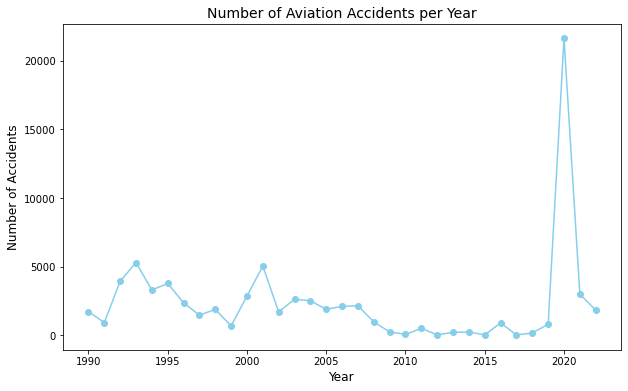

In [63]:
# Compare the incidents Year to year from 1990 to 2022 in a bar chart

Aviation_Data['Publication.Date'] = pd.to_datetime(Aviation_Data['Publication.Date'], errors='coerce')

# Extract the year from the 'Event.Date' column
Aviation_Data['Year'] = Aviation_Data['Publication.Date'].dt.year

# Filter the data to only include incidents from 1980 to 2022
Aviation_data_filtered = Aviation_Data[(Aviation_Data['Year'] >= 1990) & (Aviation_Data['Year'] <= 2022)]

# Group the data by year and count the number of incidents per year
Grouped_by_Year = Aviation_data_filtered.groupby('Year').size()

# Plot the incidents per year as a line chart
Grouped_by_Year.plot(kind='line', color='skyblue', marker='o', figsize=(10, 6))

# Generating Visuals
plt.title('Number of Aviation Accidents per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Show the plot
plt.show()


## Data Limitations

**Reporting StandardS Variations**

1) Countries like the United States have a high likelihood of better/consistent accident reporting mechanisms and by extension shall report relatively more accidents

2) Unavailability of the volumes of air traffic data Countries like the united states shall have more incidents compared to countries like kenya because of the volumes they have. The high incidents does not reflect risks level

3) Pilot details It would be intresting to see the correlation between the the pilots years of experience and the incidents

4) Historical data such as Conditions of the planes not available including year of manufacturing and other mechanical issues

## Recommendations

1.Address Weather-Related Risks: There is direct correlation between the weather and accidents as per chart 2 above The weather related accidents triggers majorly caused by a.Ineffective weather monitoring systems b.Pilot trainings and prior experience piloting in adverse weather

2.Fatal Injuries 92% of the accidents are in the United states. The high percentage calls forstricter enforcement of maintenance and operational guidelines

3.study and Trainings: Countries with many minor or non-fatal accidents to be used for targeted pilot training and enhanced preventive measures.

4.Reciprocating engines are is not reliable.Relative to the other types of engine its more likely to be invoved in an accidents. Makes up 84% of all the recorded incidents

5.Risk factor

97% of the planes irrespective of the make is either completey destroyed or substantialy destroyed. The company should focus extensively on prevention mechanism otherwise it could record huge losses